make some synthetic friges using Airy formulae  

I'm seeing some odd patterns when I test synthetic fringes across a large range of fringe fractions  

This separates out just this code so I can debug  

after commit .. I fixed `synthetic image` code so this now looks good


In [2]:
from pathlib import Path

import random
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph
from ls_fringeapp import synthetic_images as si

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [3]:
margin = 0.01

In [ ]:
# make one image
ffrac_set = 0.25
a1, gb_yx = si.synthetic_image_with_gauge(
    111,
    0,
    ffrac_set,
    (800, 400),
    (600, 200),
)
ffrac_calc, drawdata = fp.array2frac(a1, gb_yx, drawinfo=True)
ffrac_set, ffrac_calc

(0.25, np.float64(0.2525100873094809))

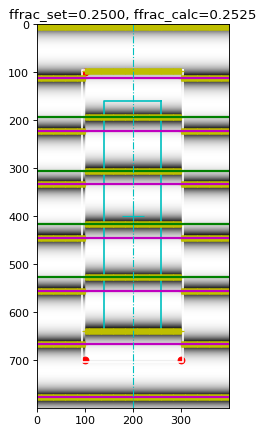

In [7]:
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title(f"{ffrac_set=:.4f}, {ffrac_calc=:.4f}")
ph.draw_gauge(ax, a1, drawdata)

In [4]:
# test every 0.1 of a fringe
img_size = (800, 400)
gb_size = (600, 200)
spacing = 80
offset = 0
ffracs1 = []
for ffrac_set in np.arange(0 + margin, 1 - margin, 0.05):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs1.append([ffrac_set, ffrac_calc])

ffracs1 = np.array(ffracs1)

diff1 = ffracs1[:, 1] - ffracs1[:, 0]
print(f"{diff1.shape=}")
print(f"{diff1.mean()=}")
print(f"{diff1.std(ddof=1)=}")
print(f"{diff1.max()=}")
print(f"{diff1.min()=}")

diff1.shape=(20,)
diff1.mean()=np.float64(0.0024980422589747403)
diff1.std(ddof=1)=np.float64(0.00012944986753262252)
diff1.max()=np.float64(0.0027795566028752383)
diff1.min()=np.float64(0.002233945505087709)


In [5]:
# pick fringe fraction randommly between 0+e, 1-e to avoid rollover non-equivalence
n_tests = 20
ffracs2 = []

for i in range(n_tests):
    ffrac_set = random.uniform(0.0 + margin, 1.0 - margin)
    spacing = 100
    offset = 0

    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs2.append([ffrac_set, ffrac_calc])

ffracs2 = np.array(ffracs2)

diff2 = ffracs2[:, 1] - ffracs2[:, 0]
print(f"{diff2.shape=}")
print(f"{diff2.mean()=}")
print(f"{diff2.std(ddof=1)=}")
print(f"{diff2.max()=}")
print(f"{diff2.min()=}")

diff2.shape=(20,)
diff2.mean()=np.float64(0.0001994133468903484)
diff2.std(ddof=1)=np.float64(0.002612937917545039)
diff2.max()=np.float64(0.004224335363725185)
diff2.min()=np.float64(-0.004837730473293056)


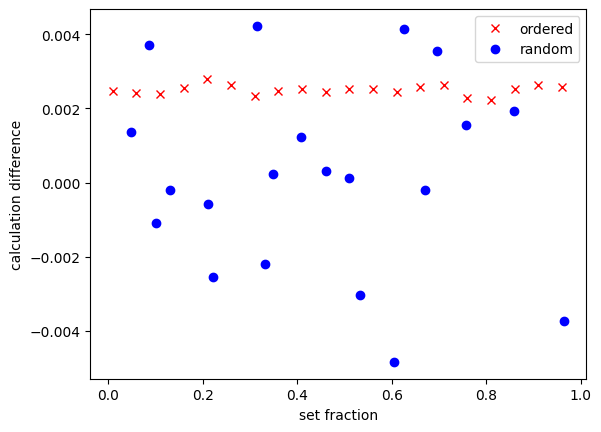

In [6]:
plt.plot(ffracs1[:, 0], diff1, "rx", label="ordered")
plt.plot(ffracs2[:, 0], diff2, "bo", label="random")
plt.xlabel("set fraction")
plt.ylabel("calculation difference")
plt.legend()

This is crazy unordered results have 10 times larger spread than ordered!!!!

In [7]:
# stupidly create a random vector and sort it
ffrac_sorted = np.random.uniform(0.0 + margin, 1.0 - margin, 20)
ffrac_sorted.sort()

In [8]:
ffracs3 = []
for ffrac_set in ffrac_sorted:
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs3.append([ffrac_set, ffrac_calc])

ffracs3 = np.array(ffracs3)

diff3 = ffracs3[:, 1] - ffracs3[:, 0]
print(f"{diff3.shape=}")
print(f"{diff3.mean()=}")
print(f"{diff3.std(ddof=1)=}")
print(f"{diff3.max()=}")
print(f"{diff3.min()=}")

diff3.shape=(20,)
diff3.mean()=np.float64(-0.0014225272304858616)
diff3.std(ddof=1)=np.float64(0.0025291195911472295)
diff3.max()=np.float64(0.0036107016536021524)
diff3.min()=np.float64(-0.005361567097814546)


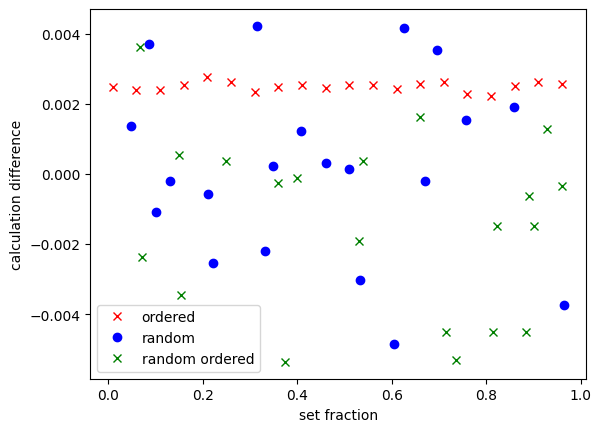

In [9]:
plt.plot(ffracs1[:, 0], diff1, "rx", label="ordered")
plt.plot(ffracs2[:, 0], diff2, "bo", label="random")
plt.plot(ffracs3[:, 0], diff3, "gx", label="random ordered")
plt.xlabel("set fraction")
plt.ylabel("calculation difference")
plt.legend()

Its not the ordering (unsurprising). Does it change if I cange the spacing? I'm thinking pixel round off.

In [10]:
spacing = 80

ffracs4 = []
for ffrac_set in np.arange(0.05, 0.85, 0.05):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs4.append([ffrac_set, ffrac_calc])

ffracs4 = np.array(ffracs4)

diff4 = ffracs4[:, 1] - ffracs4[:, 0]
print(f"{diff4.shape=}")
print(f"{diff4.mean()=}")
print(f"{diff4.std(ddof=1)=}")
print(f"{diff4.max()=}")
print(f"{diff4.min()=}")

diff4.shape=(16,)
diff4.mean()=np.float64(-1.2114359416173174e-05)
diff4.std(ddof=1)=np.float64(0.00013939673089975835)
diff4.max()=np.float64(0.00023814467660959737)
diff4.min()=np.float64(-0.00030912060201493397)


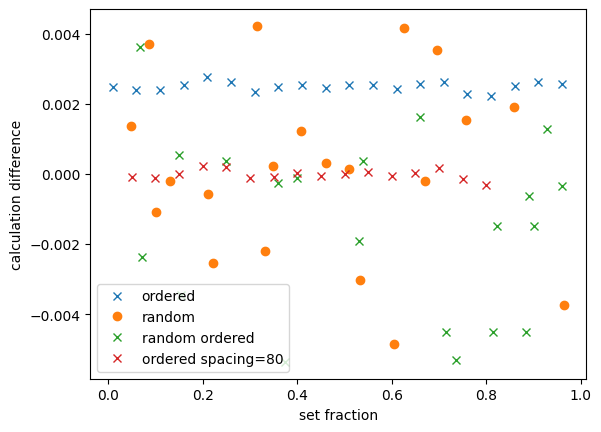

In [11]:
plt.plot(ffracs1[:, 0], diff1, "x", label="ordered")
plt.plot(ffracs2[:, 0], diff2, "o", label="random")
plt.plot(ffracs3[:, 0], diff3, "x", label="random ordered")
plt.plot(ffracs4[:, 0], diff4, "x", label=f"ordered {spacing=}")
plt.xlabel("set fraction")
plt.ylabel("calculation difference")
plt.legend()

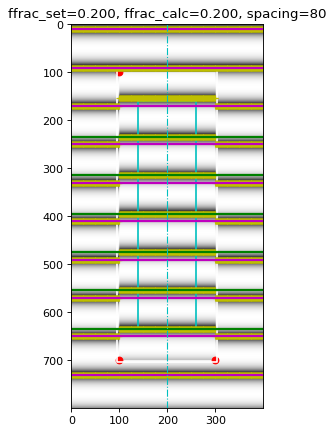

In [12]:
# look at max diff from previous calc
ffrac_set = ffracs4[np.argmax(diff4), 0]
spaing = 111
offset = 10
a1, gb_yx = si.synthetic_image_with_gauge(
    spacing,
    offset,
    ffrac_set,
    img_size,
    gb_size,
)
ffrac_calc, drawdata = fp.array2frac(a1, gb_yx, drawinfo=True)
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(f"{ffrac_set=:.3f}, {ffrac_calc=:.3f}, {spacing=}")
ph.draw_gauge(axes, a1, drawdata)

(np.float64(-0.5), np.float64(399.5), np.float64(799.5), np.float64(-0.5))

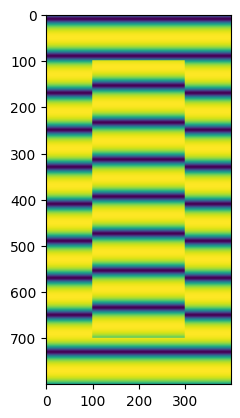

In [13]:
plt.imshow(a1)
plt.axis("image")

In [14]:
# loop over offset for constant spacing and fringe fraction
spacing = 111
ffrac_set = 0.41

ffracs5 = []
for offset in np.arange(0, 111, 5):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs5.append([offset, ffrac_calc])

ffracs5 = np.array(ffracs5)


In [15]:
diff5 = ffracs5[:, 1] - ffrac_set
print(f"{diff5.shape=}")
print(f"{diff5.mean()=}")
print(f"{diff5.std(ddof=1)=}")
print(f"{diff5.max()=}")
print(f"{diff5.min()=}")

diff5.shape=(23,)
diff5.mean()=np.float64(0.004459836654536637)
diff5.std(ddof=1)=np.float64(0.00020570800866778543)
diff5.max()=np.float64(0.004811056491239474)
diff5.min()=np.float64(0.0038773914102034346)


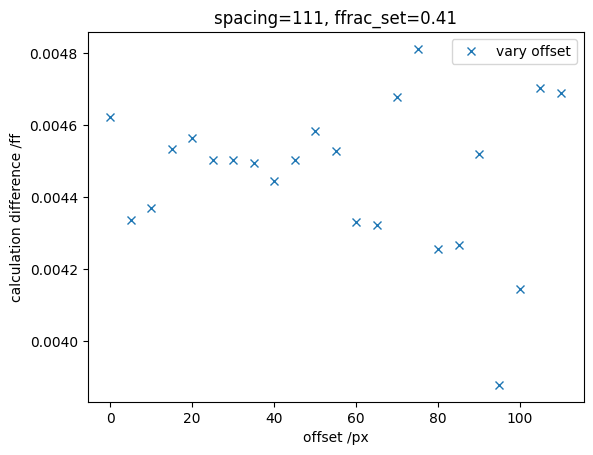

In [16]:
plt.plot(ffracs5[:, 0], diff5, "x", label="vary offset")

plt.xlabel("offset /px")
plt.ylabel("calculation difference /ff")
plt.title(f"{spacing=}, {ffrac_set=}")
plt.legend()

In [17]:
# loop over spacing for constant offset and fringe fraction
offset = 0
ffrac_set = 0.416

ffracs6 = []
for spacing in np.arange(80, 100, 1):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs6.append([spacing, ffrac_calc])

ffracs6 = np.array(ffracs6)

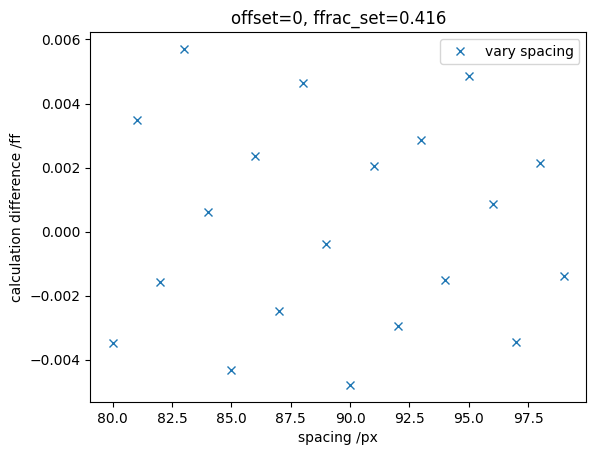

In [18]:
diff6 = ffracs6[:, 1] - ffrac_set
plt.plot(ffracs6[:, 0], diff6, "x", label="vary spacing")

plt.xlabel("spacing /px")
plt.ylabel("calculation difference /ff")
plt.title(f"{offset=}, {ffrac_set=}")
plt.legend()

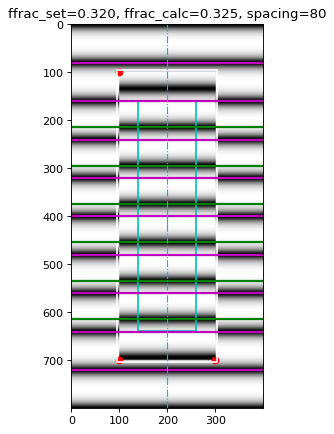

In [19]:
ffrac_set = 0.32
spacing = 80
offset = 0
a1, gb_yx = si.synthetic_image_with_gauge(
    spacing,
    offset,
    ffrac_set,
    img_size,
    gb_size,
)
ffrac_calc, drawdata = fp.array2frac(a1, gb_yx, drawinfo=True)
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(f"{ffrac_set=:.3f}, {ffrac_calc=:.3f}, {spacing=}")
ph.draw_gauge(axes, a1, drawdata, peaks=False)

(np.float64(-0.5), np.float64(399.5), np.float64(799.5), np.float64(-0.5))

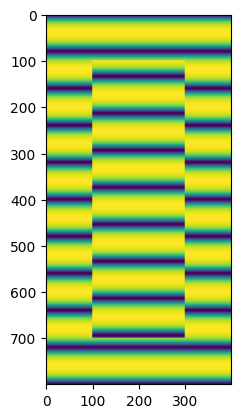

In [20]:
plt.imshow(a1)
plt.axis("image")

In [21]:
0.004 * 633 / 2

1.266

In [22]:
# random gb_size, image_size, spacing, offset, ffrac
n_tests = 50
ffracs2 = []

for i in range(n_tests):
    ffrac_set = random.uniform(0.0 + margin, 1.0 - margin)
    spacing = random.uniform(80, 120)
    offset = random.uniform(0, spacing)
    img_size = (int(random.uniform(750, 850)), int(random.uniform(350, 450)))
    gb_size = (int(random.uniform(550, 650)), int(random.uniform(150, 250)))

    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs2.append(
        [
            spacing,
            offset,
            img_size[0],
            img_size[1],
            gb_size[0],
            gb_size[1],
            ffrac_set,
            ffrac_calc,
        ],
    )

ffracs2 = np.array(ffracs2)


In [23]:
diff2 = ffracs2[:, -1] - ffracs2[:, -2]
print(f"{diff2.shape=}")
print(f"{diff2.mean()=}")
print(f"{diff2.std(ddof=1)=}")
print(f"{diff2.max()=}")
print(f"{diff2.min()=}")

diff2.shape=(50,)
diff2.mean()=np.float64(-6.811358569109499e-05)
diff2.std(ddof=1)=np.float64(0.002727908994019291)
diff2.max()=np.float64(0.005881114598401682)
diff2.min()=np.float64(-0.0049232262804235205)


Text(0, 0.5, 'fringe fraction difference')

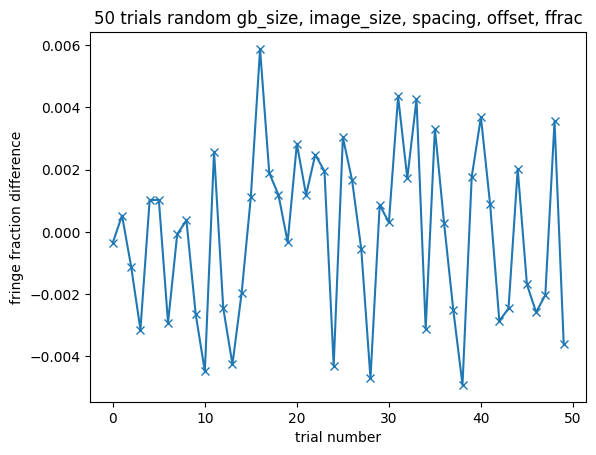

In [25]:
plt.plot(diff2, "x-")
plt.title(f"{n_tests} trials random gb_size, image_size, spacing, offset, ffrac")
plt.xlabel("trial number")
plt.ylabel("fringe fraction difference")

Text(0.5, 1.0, 'spacing')

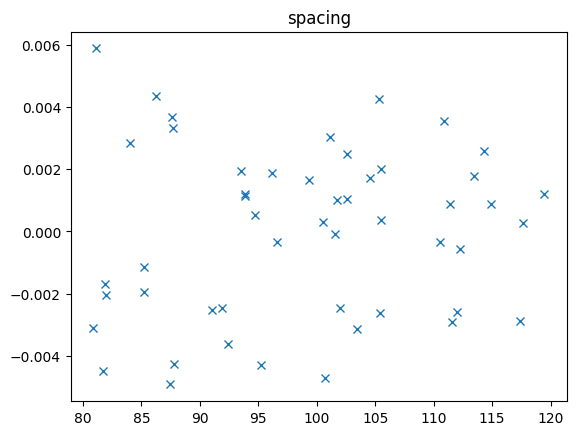

In [26]:
plt.plot(ffracs2[:, 0], diff2, "x")
plt.title("spacing")

Text(0.5, 1.0, 'offset')

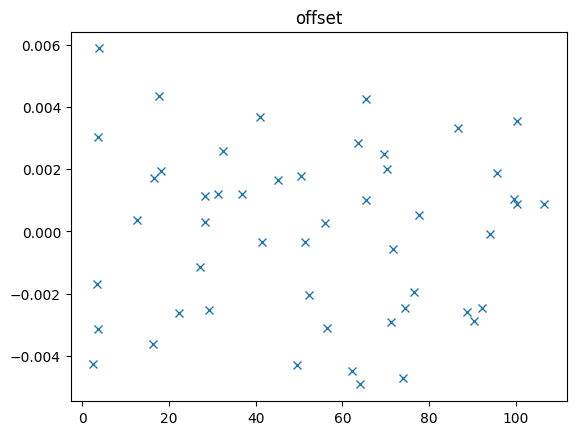

In [27]:
plt.plot(ffracs2[:, 1], diff2, "x")
plt.title("offset")

Text(0.5, 1.0, 'img_size[0]')

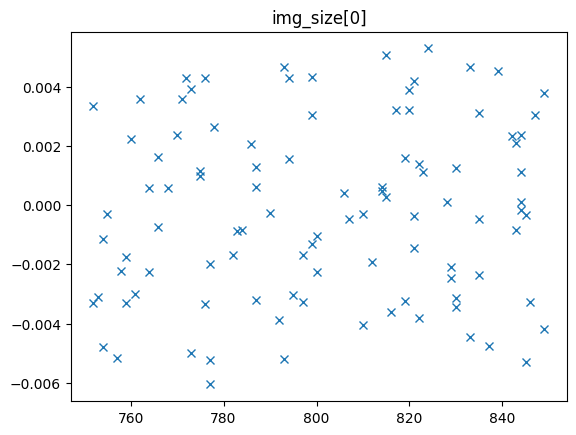

In [ ]:
plt.plot(ffracs2[:, 2], diff2, "x")
plt.title("img_size[0]")

Text(0.5, 1.0, 'img_size[1]')

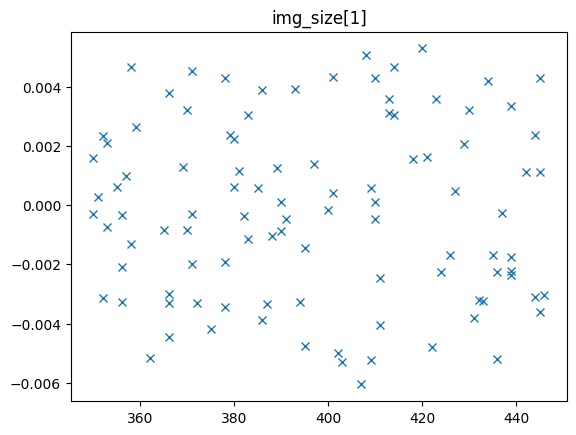

In [ ]:
plt.plot(ffracs2[:, 3], diff2, "x")
plt.title("img_size[1]")

Text(0.5, 1.0, 'gb_size[0]')

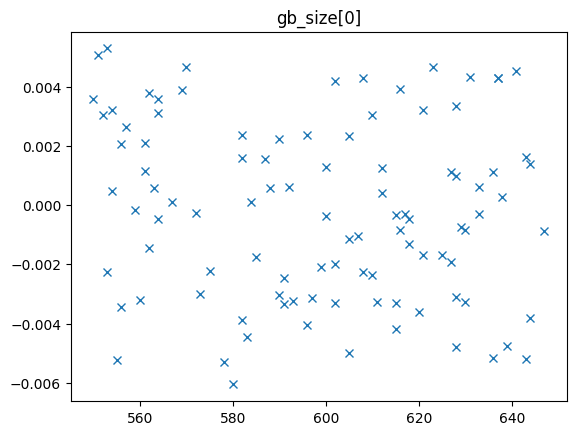

In [ ]:
plt.plot(ffracs2[:, 4], diff2, "x")
plt.title("gb_size[0]")

Text(0.5, 1.0, 'gb_size[1]')

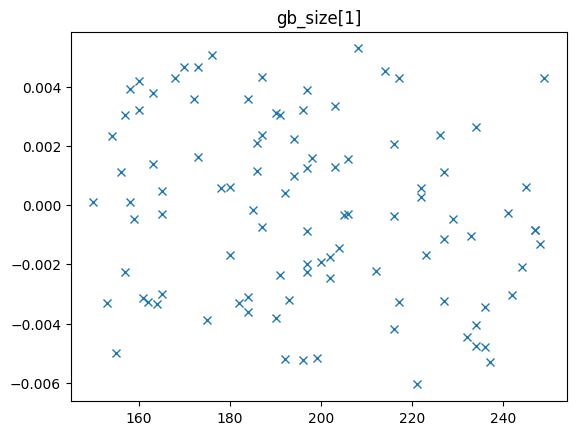

In [ ]:
plt.plot(ffracs2[:, 5], diff2, "x")
plt.title("gb_size[1]")